In [1]:
from datetime import datetime, timedelta
import json
import math
import pytz

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
# import scipy
import scipy.stats as st
# pd.set_option('max_columns', 50)
import requests

mpl.style.use('ggplot')

%matplotlib inline

In [20]:
before_hole = "2024-01-01_15:46:38.csv"
one_hole = "2024-01-01_15:57:05.csv"
two_hole = "2024-01-01_16:11:23.csv"

ddir = "data/experiments/2024-jan-01"

df = pd.DataFrame()

df["no_hole" ] = pd.read_csv(f"{ddir}/{before_hole}")
df["one_hole"] = pd.read_csv(f"{ddir}/{one_hole}")
df["two_hole"] = pd.read_csv(f"{ddir}/{two_hole}")

df

,no_hole,one_hole,two_hole
0,556.78,128.00,0.00
1,115.48,844.40,0.00
2,112.18,113.54,104.94
3,109.02,902.68,0.00
4,188.06,120.26,122.24
...,...,...,...
119,93.48,115.98,0.00
120,103.58,82.64,123.48
121,106.94,82.28,NaN
122,113.82,NaN,NaN


<Axes: >

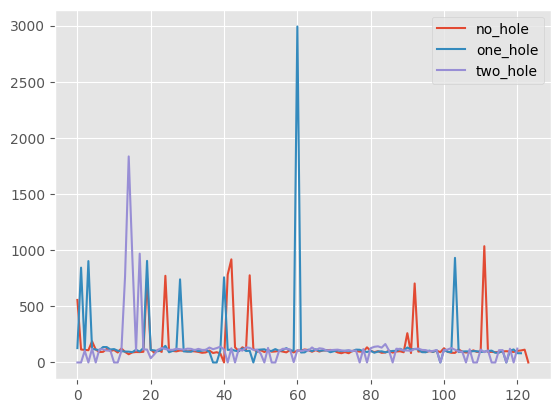

In [21]:
df.plot()

<Axes: >

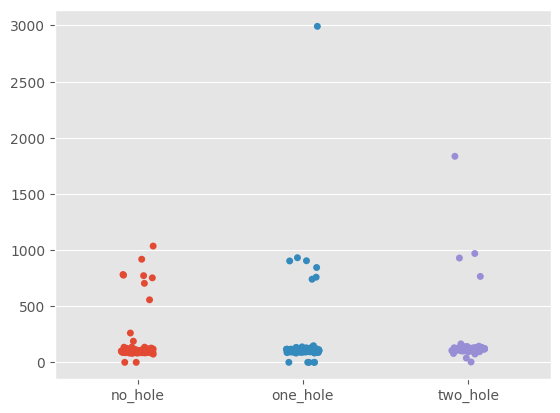

In [37]:
sns.stripplot(data=df)

In [7]:
df.mean

<bound method DataFrame.mean of      no_hole  one_hole
0     556.78    128.00
1     115.48    844.40
2     112.18    113.54
3     109.02    902.68
4     188.06    120.26
..       ...       ...
119    93.48    115.98
120   103.58     82.64
121   106.94     82.28
122   113.82       NaN
123     0.00       NaN

[124 rows x 2 columns]>

In [9]:
df["no_hole"].mean()

144.92435483870966

In [10]:
df["one_hole"].mean()

161.50065573770493

In [11]:
df["no_hole"].median()

99.06

In [12]:
df["one_hole"].median()

104.19999999999999

In [36]:
for col in df.columns:
    print(f"Mean: {df[col].median()}")

Mean: 99.06
Mean: 104.19999999999999
Mean: 114.08


<Axes: >

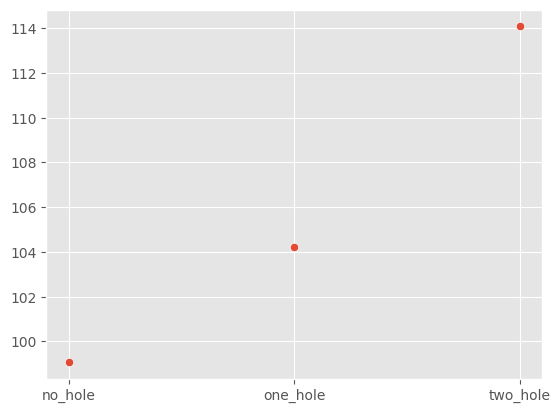

In [38]:
sns.scatterplot(data=df.median())

In [46]:
m = df.median()
type(m)

pandas.core.series.Series

/tmp/ipykernel_132246/3049967666.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  medians[xtick] + vertical_offset[xtick],
/tmp/ipykernel_132246/3049967666.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  medians[xtick],


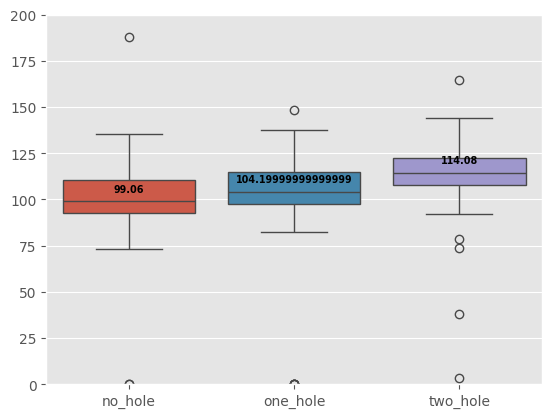

In [62]:
fig, ax = plt.subplots(1, 1)
box_plot = sns.boxplot(data=df, ax=ax)
ax.set_ylim(0, 200)

medians = df.median()
vertical_offset = df.median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[xtick] + vertical_offset[xtick], 
                  medians[xtick],
                  horizontalalignment='center',
                  size='x-small',
                  color='black',
                  weight='semibold')

In [ ]:
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[xtick] + vertical_offset, 
                  medians[xtick],
                  horizontalalignment='center',
                  size='x-small',
                  color='w',
                  weight='semibold')

In [34]:
df["two_hole"] = df[df["two_hole"] > 0]["two_hole"]

In [41]:
l = 6 * 2.54
l

15.24

In [43]:
(l * 1e6)/ 9900

1539.3939393939395